In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path_data = "/Users/samtaubman/Dropbox/My Mac (Sam’s MacBook Pro)/Documents/Interviews_2023/Uncountable/battery_parsing.txt"
column_names = ['mode', 'ox/red', 'error', 'control changes', 'Ns changes', 'counter inc.', 'Ns', 'time/s', 'dq/mA.h',
    '(Q-Qo)/mA.h', 'control/V/mA', 'Ecell/V', 'Q charge/discharge/mA.h', 'half cycle', '<I>/mA', 'x', 'cycle number',
    'Q charge/mA.h', 'Q discharge/mA.h', 'Energy/W.h', 'Energy charge/W.h', 'Energy discharge/W.h', 'cycle time/s',
    'step time/s', 'charge time/s', 'discharge time/s', 'd(Q-Qo)/dE/mA.h/V', 'Capacity/mA.h', 'Efficiency/%',
    'control/V', 'control/mA', 'P/W']
data = pd.read_csv(path_data, sep='\t', header=None, skiprows=74, names=column_names)

In [2]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
data.head(1000)

,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,time/s,dq/mA.h,(Q-Qo)/mA.h,...,cycle time/s,step time/s,charge time/s,discharge time/s,d(Q-Qo)/dE/mA.h/V,Capacity/mA.h,Efficiency/%,control/V,control/mA,P/W
0,3,0,0,0,0,0,0,6.000000,0.000000,0.000000,...,6.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.000000
1,3,0,0,0,0,0,0,7.000000,0.000000,0.000000,...,7.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.000000
2,3,0,0,0,0,0,0,8.000000,0.000000,0.000000,...,8.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.000000
3,3,0,0,0,0,0,0,9.000000,0.000000,0.000000,...,9.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.000000
4,1,1,0,1,1,0,1,19.000001,0.149558,0.149558,...,19.000001,0.000000,0.0,0.000000,0.0000,0.149558,0.0,0.0,60.0,0.194693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,0,2,17881.732849,-0.166694,97.966395,...,17881.732849,3010.000143,0.0,3010.000143,0.0000,50.340835,0.0,0.0,-60.0,-0.228280
996,1,0,0,1,0,0,2,17891.732850,-0.166694,97.799701,...,17891.732850,3020.000143,0.0,3020.000143,0.0000,50.507528,0.0,0.0,-60.0,-0.228252
997,1,0,0,1,0,0,2,17901.732850,-0.166694,97.633007,...,17901.732850,3030.000144,0.0,3030.000144,-340.5101,50.674222,0.0,0.0,-60.0,-0.228219
998,1,0,0,1,0,0,2,17911.732851,-0.166694,97.466313,...,17911.732851,3040.000144,0.0,3040.000144,0.0000,50.840916,0.0,0.0,-60.0,-0.228200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89301 entries, 0 to 89300
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mode                     89301 non-null  int64  
 1   ox/red                   89301 non-null  int64  
 2   error                    89301 non-null  int64  
 3   control changes          89301 non-null  int64  
 4   Ns changes               89301 non-null  int64  
 5   counter inc.             89301 non-null  int64  
 6   Ns                       89301 non-null  int64  
 7   time/s                   89301 non-null  float64
 8   dq/mA.h                  89301 non-null  float64
 9   (Q-Qo)/mA.h              89301 non-null  float64
 10  control/V/mA             89301 non-null  float64
 11  Ecell/V                  89301 non-null  float64
 12  Q charge/discharge/mA.h  89301 non-null  float64
 13  half cycle               89301 non-null  int64  
 14  <I>/mA                

In [4]:
data.describe()

,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,time/s,dq/mA.h,(Q-Qo)/mA.h,...,cycle time/s,step time/s,charge time/s,discharge time/s,d(Q-Qo)/dE/mA.h/V,Capacity/mA.h,Efficiency/%,control/V,control/mA,P/W
count,89301.000000,89301.000000,89301.0,89301.000000,89301.000000,89301.000000,89301.000000,8.930100e+04,89301.000000,89301.000000,...,89301.000000,89301.000000,89301.000000,89301.000000,89301.000000,89301.000000,89301.000000,89301.000000,89301.000000,89301.000000
mean,1.231868,0.382459,0.0,0.785109,0.006764,0.499703,3.540946,1.252555e+06,0.001328,127.465640,...,6450.161281,1569.892276,939.439481,630.452795,-37.873890,48.402477,0.336953,0.821356,-74.153929,-0.213761
std,0.460500,0.485991,0.0,0.410749,0.081963,0.500003,0.626331,8.310743e+05,0.787455,39.086488,...,3944.145618,1864.028699,1928.852653,968.859222,82.117759,32.982378,5.784742,1.653502,137.421479,0.520594
min,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.000000e+00,-0.500263,-9.358140,...,0.000000,0.000000,0.000000,0.000000,-361.273350,0.000000,0.000000,0.000000,-180.000000,-0.727594
25%,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,3.000000,5.069172e+05,-0.500216,103.045270,...,3175.378379,379.999706,0.000000,0.000000,-94.069351,20.506214,0.000000,0.000000,-180.000000,-0.634797
50%,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,4.000000,1.179698e+06,-0.500195,132.395284,...,7629.052909,940.000112,0.000000,290.000035,-39.687302,46.020359,0.000000,0.000000,-180.000000,-0.553362
75%,1.000000,1.000000,0.0,1.000000,0.000000,1.000000,4.000000,1.958374e+06,0.499847,159.981020,...,8632.504900,1740.228207,594.611539,1030.000123,0.000000,69.028166,0.000000,0.000000,0.000000,0.118495
max,3.000000,1.000000,0.0,1.000000,1.000000,1.000000,4.000000,2.815229e+06,5.588661,184.277681,...,24370.081158,14842.732705,14842.732705,9586.088455,494.383820,161.896938,106.309230,4.150044,180.000000,0.746896


In [5]:
data.shape

(89301, 32)

In [6]:
data.isna().any()

mode                       False
ox/red                     False
error                      False
control changes            False
Ns changes                 False
counter inc.               False
Ns                         False
time/s                     False
dq/mA.h                    False
(Q-Qo)/mA.h                False
control/V/mA               False
Ecell/V                    False
Q charge/discharge/mA.h    False
half cycle                 False
<I>/mA                     False
x                          False
cycle number               False
Q charge/mA.h              False
Q discharge/mA.h           False
Energy/W.h                 False
Energy charge/W.h          False
Energy discharge/W.h       False
cycle time/s               False
step time/s                False
charge time/s              False
discharge time/s           False
d(Q-Qo)/dE/mA.h/V          False
Capacity/mA.h              False
Efficiency/%               False
control/V                  False
control/mA

In [7]:
data.duplicated().any()

False

In [8]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,time/s,dq/mA.h,(Q-Qo)/mA.h,...,cycle time/s,step time/s,charge time/s,discharge time/s,d(Q-Qo)/dE/mA.h/V,Capacity/mA.h,Efficiency/%,control/V,control/mA,P/W


In [9]:
selected_columns = ['cycle number', 'half cycle', 'Capacity/mA.h', 'Q charge/mA.h', 'Q discharge/mA.h']
data2 = data[selected_columns].set_index('cycle number')

In [10]:
data2.head(10000)

,half cycle,Capacity/mA.h,Q charge/mA.h,Q discharge/mA.h
cycle number,,,,
1.0,0,0.000000,0.000000,0.000000
1.0,0,0.000000,0.000000,0.000000
1.0,0,0.000000,0.000000,0.000000
1.0,0,0.000000,0.000000,0.000000
1.0,0,0.149558,0.149558,0.000000
...,...,...,...,...
15.0,29,59.026178,0.000000,59.026178
15.0,29,59.526413,0.000000,59.526413
15.0,29,60.026646,0.000000,60.026646


In [11]:
charge_column = 'Q charge/mA.h'
discharge_column = 'Q discharge/mA.h'
max_charge = data.groupby('cycle number')[charge_column].max()
max_discharge = data.groupby('cycle number')[discharge_column].max()

result_df = pd.DataFrame({'cycle number': max_charge.index,
                          'Max Charge': max_charge.values,
                          'Max Discharge': max_discharge.values})

In [12]:
result_df.head(11)

,cycle number,Max Charge,Max Discharge
0,1.0,148.307229,157.664269
1,2.0,161.896938,159.960732
2,3.0,161.671986,141.108756
3,4.0,144.443042,141.831234
4,5.0,143.358322,141.640671
5,6.0,142.753424,141.435077
6,7.0,142.607838,142.312603
7,8.0,142.881618,141.826731
8,9.0,142.383345,141.459805
9,10.0,141.782504,140.433847


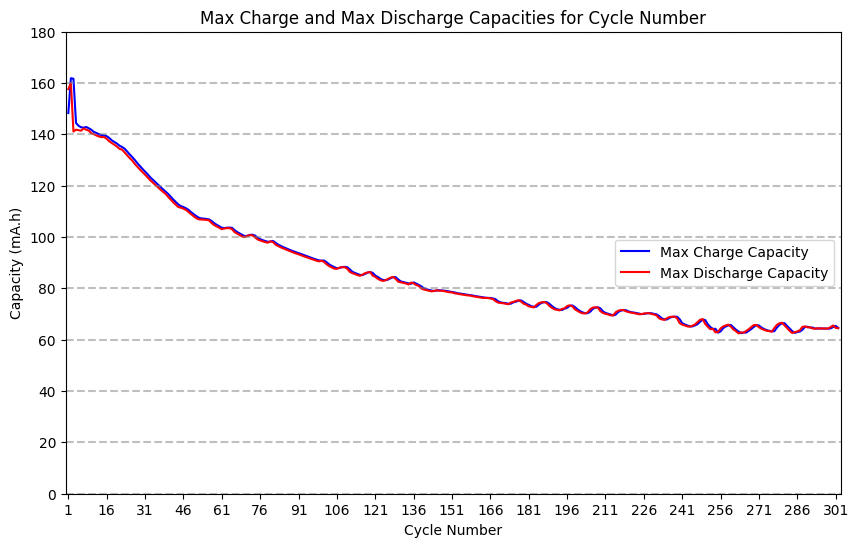

In [13]:
charge_column = 'Q charge/mA.h'
discharge_column = 'Q discharge/mA.h'

max_charge = data.groupby('cycle number')[charge_column].max()
max_discharge = data.groupby('cycle number')[discharge_column].max()

plt.figure(figsize=(10, 6))
plt.plot(max_charge.index, max_charge.values, label='Max Charge Capacity', color='blue')
plt.plot(max_discharge.index, max_discharge.values, label='Max Discharge Capacity', color='red')

plt.xlabel('Cycle Number')
plt.ylabel('Capacity (mA.h)')
plt.title('Max Charge and Max Discharge Capacities for Cycle Number')

xaxis_cycles = np.arange(1, 302, 15)
plt.xticks(xaxis_cycles)
yaxis_capacity = np.arange(0, 200, 20)
plt.yticks(yaxis_capacity)

plt.xlim(0, max_charge.index.max() + 1)
plt.ylim(0, 180)

for capacity in yaxis_capacity:
    plt.axhline(y=capacity, color='gray', linestyle='--', alpha=0.5)

plt.legend()

plt.show()